# Introduction

Team Members: Kevin Dannenberg, Rohan Rashid, Shuke Zeng

Project Mentor TA: Bharath Manthripragada

In [ ]:
import glob as glob
import pandas as pd
import gdown
import numpy as np

# Part 1: Import and Clean the Data

## Existing Datasets

First we import the existing datasets into DataFrames and clean them.

In [ ]:
fname_class_bp = 'BugPrediction-unified-class.csv'
gdown.download('https://drive.google.com/uc?id=1WIoLToMryBtgwOmf2AxiIbbDnQBAJ6uG', fname_class_bp, quiet=False)
df_class_bp = pd.read_csv(fname_class_bp)
df_class_bp = df_class_bp.dropna()

fname_class_gh = 'GitHub-unified-class.csv'
gdown.download('https://drive.google.com/uc?id=1D0DpBKygWeVlSdfWd8QvskwAmIaJVIu_', fname_class_gh, quiet=False)
df_class_gh = pd.read_csv(fname_class_gh)
df_class_gh = df_class_gh.dropna()

fname_class_pr = 'PROMISE-unified-class.csv'
gdown.download('https://drive.google.com/uc?id=1PudehQYZwiq3gAnJajQDtfEWtDSiKBKw', fname_class_pr, quiet=False)
df_class_pr = pd.read_csv(fname_class_pr, low_memory=False)
df_class_pr = df_class_pr.dropna()

fname_file_bc = 'Bugcatchers-unified-file.csv'
gdown.download('https://drive.google.com/uc?id=1gLhu5xUzKx0YMDK8FEdCgU_PAO1ZGJW5', fname_file_bc, quiet=False)
df_file_bc = pd.read_csv(fname_file_bc)
df_file_bc = df_file_bc.dropna()

fname_file_ec = 'Zimmerman-unified-file.csv'
gdown.download('https://drive.google.com/uc?id=1xWPp0iC5QtXiojXXgV0KDKCOrHO6x9gk', fname_file_ec, quiet=False)
df_file_ec = pd.read_csv(fname_file_ec)
df_file_ec = df_file_ec.dropna()

fname_file_gh = 'GitHub-unified-file.csv'
gdown.download('https://drive.google.com/uc?id=1WcfZhncSF5ahXeiGa3KNWgjjjS1iPN4M', fname_file_gh, quiet=False)
df_file_gh = pd.read_csv(fname_file_gh)
df_file_gh = df_file_gh.dropna()

Downloading...
From: https://drive.google.com/uc?id=1WIoLToMryBtgwOmf2AxiIbbDnQBAJ6uG
To: /content/BugPrediction-unified-class.csv
100%|██████████| 7.33M/7.33M [00:00<00:00, 29.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1D0DpBKygWeVlSdfWd8QvskwAmIaJVIu_
To: /content/GitHub-unified-class.csv
100%|██████████| 14.9M/14.9M [00:00<00:00, 29.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PudehQYZwiq3gAnJajQDtfEWtDSiKBKw
To: /content/PROMISE-unified-class.csv
100%|██████████| 18.6M/18.6M [00:00<00:00, 36.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gLhu5xUzKx0YMDK8FEdCgU_PAO1ZGJW5
To: /content/Bugcatchers-unified-file.csv
100%|██████████| 2.60M/2.60M [00:00<00:00, 31.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xWPp0iC5QtXiojXXgV0KDKCOrHO6x9gk
To: /content/Zimmerman-unified-file.csv
100%|██████████| 45.8M/45.8M [00:00<00:00, 67.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WcfZhncSF5ahXeiGa3KNWgjjjS1iPN4M
To: /content/Gi

Then we make copies of the DataFrames with only rows that can be used in our unified datasets.

In [ ]:
class_columns = ['ID', 'Type', 'Name', 'LongName', 'Parent', 'Component', 'Path', 'Line', 'Column', 'EndLine',\
                 'EndColumn', 'CC', 'CCL', 'CCO', 'CI', 'CLC', 'CLLC', 'LDC', 'LLDC', 'LCOM5', 'NL', 'NLE', 'WMC',\
                 'CBO', 'CBOI', 'NII', 'NOI', 'RFC', 'AD', 'CD', 'CLOC', 'DLOC', 'PDA', 'PUA', 'TCD', 'TCLOC',\
                 'DIT', 'NOA', 'NOC', 'NOD', 'NOP', 'LLOC', 'LOC', 'NA', 'NG', 'NLA', 'NLG', 'NLM', 'NLPA', 'NLPM',\
                 'NLS', 'NM', 'NOS', 'NPA', 'NPM', 'NS', 'TLLOC', 'TLOC', 'TNA', 'TNG', 'TNLA', 'TNLG', 'TNLM',\
                 'TNLPA', 'TNLPM', 'TNLS', 'TNM', 'TNOS', 'TNPA', 'TNPM', 'TNS', 'bug']
df_class_bp_tomerge = df_class_bp[class_columns]
df_class_gh_tomerge = df_class_gh[class_columns]
df_class_pr_tomerge = df_class_pr[class_columns]

file_columns = ['ID', 'Name', 'LongName', 'Parent', 'McCC', 'CLOC', 'PDA', 'PUA', 'LLOC', 'LOC', 'bug']
df_file_bc_tomerge = df_file_bc[file_columns]
df_file_ec_tomerge = df_file_ec[file_columns]
df_file_gh_tomerge = df_file_gh[file_columns]

Next we update the IDs of the DataFrame copies so we know which dataset each row came from after merging. The IDs will be as follows:
*   BugPrediction IDs will start with B
*   Bugcatchers IDs will start with C
*   Eclipse IDs will start with E
*   GitHub IDs will start with G
*   Promise IDs will start with P

In [ ]:
df_class_bp_tomerge[['ID', 'Parent', 'Component']] = df_class_bp_tomerge[['ID', 'Parent', 'Component']].replace('L', 'B', regex=True)
df_class_gh_tomerge[['ID', 'Parent', 'Component']] = df_class_gh_tomerge[['ID', 'Parent', 'Component']].replace('L', 'G', regex=True)
df_class_pr_tomerge[['ID', 'Parent', 'Component']] = df_class_pr_tomerge[['ID', 'Parent', 'Component']].replace('L', 'P', regex=True)
df_file_bc_tomerge[['ID', 'Parent']] = df_file_bc_tomerge[['ID', 'Parent']].replace('L', 'C', regex=True)
df_file_ec_tomerge[['ID', 'Parent']] = df_file_ec_tomerge[['ID', 'Parent']].replace('L', 'E', regex=True)
df_file_gh_tomerge[['ID', 'Parent']] = df_file_gh_tomerge[['ID', 'Parent']].replace('L', 'G', regex=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Finally we merge our existing datasets together. We will also make sure the 'bugs' column is an integer and not a float.

In [ ]:
# merge all class and all file datasets into unified datasets
df_class_unified = pd.concat([df_class_bp_tomerge, df_class_gh_tomerge, df_class_pr_tomerge])
df_file_unified = pd.concat([df_file_bc_tomerge, df_file_ec_tomerge, df_file_gh_tomerge])

# update the 'bug' column to an integer
df_class_unified['bug'] = df_class_unified['bug'].astype('int')
df_file_unified['bug'] = df_file_unified['bug'].astype('int')

## New Dataset

We now import the new dataset we are contributing. This dataset contains 131033 new rows from 23 different sources. We will repeat the same import and cleaning steps as above. This dataset uses different naming conventions for some of its features, so we update column names. The new dataset also does not contain all features in the existing unified dataset, so we will remove those columns before merging as well. Luckily, most of the dominant predictors exist in the new dataset.

In [ ]:
# load and clean data
fname_class_esem = 'ESEM-unified-class.csv'
gdown.download('https://drive.google.com/uc?id=1YO-_H3vsZ-BcSaZ2epYUsJnrvMoPPn4h', fname_class_esem, quiet=False)
df_class_esem = pd.read_csv(fname_class_esem)
df_class_esem = df_class_esem.dropna()

# rename and drop columns for merging with unified dataset
df_class_esem_tomerge = df_class_esem.rename(columns={'numberOfMethods': 'NM', 'rfc': 'RFC', 'cbo': 'CBO', 'lcom2': 'LCOM5', 'ccml': 'CLOC', 'dit': 'DIT', 'nos': 'NOS'})
df_class_esem_tomerge = df_class_esem_tomerge[['Parent', 'NM', 'RFC', 'CBO', 'LCOM5', 'CLOC', 'DIT', 'NOS', 'bug']]

# concatenate df_class_unified with df_class_esem and put into new DataFrame
df_class_unified_new = df_class_unified[['Parent', 'NM', 'RFC', 'CBO', 'LCOM5', 'CLOC', 'DIT', 'NOS', 'bug']]
df_class_unified_new = pd.concat([df_class_unified_new, df_class_esem_tomerge])

Downloading...
From: https://drive.google.com/uc?id=1YO-_H3vsZ-BcSaZ2epYUsJnrvMoPPn4h
To: /content/ESEM-unified-class.csv
100%|██████████| 33.4M/33.4M [00:00<00:00, 184MB/s]


# Part 2: Generate New Features

## Average of Dominant Predictors
Our hypothesis is that bugs begets more bugs. That is, a class/file is more likely to contain a bug if other classes/files also contain bugs. The paper identified the dominating features in bug prediction, they are:
*   **Bug Prediction Class:** WMC, TNOS, cvsEntropy
*   **GitHub Class:** WMC, NOA, TNOS
*   **Promise Class:** LOC, DIT, TNM
*   **Unified Class:** CLOC, TCLOC, CBO, NOI, DIT
*   **Bugcatchers File:** code, PDA, SpeculativeGenerality
*   **GitHub File:** McCC, Number of previous modifications, Number of developer commits
*   **Eclipse File:** TypeLiteral, NSF_max, MLOC_sum
*   **Unified File:** LOC, McCC

Since we don't know what the dominant predictors will be with the new dataset yet, we will simply run a model on the base features and see how it performs.

We will calculate the average of these features to see if it helps a newly trained model perform better. Then we will move the 'bug' column to the end so our exported CSV is cleaner.

In [ ]:
# add features for df_class_bp
df_class_bp['AVGWMC'] = df_class_bp['WMC'].groupby(df_class_bp['Parent']).transform('mean')
df_class_bp['AVGTNOS'] = df_class_bp['TNOS'].groupby(df_class_bp['Parent']).transform('mean')
df_class_bp['AVGCvsEntropy'] = df_class_bp['CvsEntropy'].groupby(df_class_bp['Parent']).transform('mean')
df_class_bp = df_class_bp[[col for col in df_class_bp.columns if col != 'bug'] + ['bug']]

# add features for df_class_gh
df_class_gh['AVGWMC'] = df_class_gh['WMC'].groupby(df_class_gh['Parent']).transform('mean')
df_class_gh['AVGNOA'] = df_class_gh['NOA'].groupby(df_class_gh['Parent']).transform('mean')
df_class_gh['AVGTNOS'] = df_class_gh['TNOS'].groupby(df_class_gh['Parent']).transform('mean')
df_class_gh = df_class_gh[[col for col in df_class_gh.columns if col != 'bug'] + ['bug']]

# add features for df_class_pr
df_class_pr['AVGLOC'] = df_class_pr['LOC'].groupby(df_class_pr['Parent']).transform('mean')
df_class_pr['AVGDIT'] = df_class_pr['DIT'].groupby(df_class_pr['Parent']).transform('mean')
df_class_pr['AVGTNM'] = df_class_pr['TNM'].groupby(df_class_pr['Parent']).transform('mean')
df_class_pr = df_class_pr[[col for col in df_class_pr.columns if col != 'bug'] + ['bug']]

# add features for df_class_unified
df_class_unified['AVGCLOC'] = df_class_unified['CLOC'].groupby(df_class_unified['Parent']).transform('mean')
df_class_unified['AVGTCLOC'] = df_class_unified['TCLOC'].groupby(df_class_unified['Parent']).transform('mean')
df_class_unified['AVGCBO'] = df_class_unified['CBO'].groupby(df_class_unified['Parent']).transform('mean')
df_class_unified['AVGNOI'] = df_class_unified['NOI'].groupby(df_class_unified['Parent']).transform('mean')
df_class_unified['AVGDIT'] = df_class_unified['DIT'].groupby(df_class_unified['Parent']).transform('mean')
df_class_unified = df_class_unified[[col for col in df_class_unified.columns if col != 'bug'] + ['bug']]

# add features for df_file_bc
df_file_bc['AVGcode'] = df_file_bc['code'].groupby(df_file_bc['Parent']).transform('mean')
df_file_bc['AVGPDA'] = df_file_bc['PDA'].groupby(df_file_bc['Parent']).transform('mean')
df_file_bc['AVGSpeculativeGenerality'] = df_file_bc['SpeculativeGenerality'].groupby(df_file_bc['Parent']).transform('mean')
df_file_bc = df_file_bc[[col for col in df_file_bc.columns if col != 'bug'] + ['bug']]

# add features for df_file_gh
df_file_gh['AVGMcCC'] = df_file_gh['McCC'].groupby(df_file_gh['Parent']).transform('mean')
df_file_gh['AVGNumPrevMods'] = df_file_gh['Number of previous modifications'].groupby(df_file_gh['Parent']).transform('mean')
df_file_gh['AVGNumDevCommits'] = df_file_gh['Number of developer commits'].groupby(df_file_gh['Parent']).transform('mean')
df_file_gh = df_file_gh[[col for col in df_file_gh.columns if col != 'bug'] + ['bug']]

# add features for df_file_ec
df_file_ec['AVGTypeLiteral'] = df_file_ec['TypeLiteral'].groupby(df_file_ec['Parent']).transform('mean')
df_file_ec['AVGNSF_max'] = df_file_ec['NSF_max'].groupby(df_file_ec['Parent']).transform('mean')
df_file_ec['AVGMLOC_max'] = df_file_ec['MLOC_max'].groupby(df_file_ec['Parent']).transform('mean')
df_file_ec = df_file_ec[[col for col in df_file_ec.columns if col != 'bug'] + ['bug']]

# add features for df_file_unified
df_file_unified['AVGLOC'] = df_file_unified['LOC'].groupby(df_file_unified['Parent']).transform('mean')
df_file_unified['AVGMcCC'] = df_file_unified['McCC'].groupby(df_file_unified['Parent']).transform('mean')
df_file_unified = df_file_unified[[col for col in df_file_unified.columns if col != 'bug'] + ['bug']]

# Part 3: Modeling

Here we run our data through machine learning models that try to predict whether there are bugs present in a code file. First we will take care of some necessary imports for this section.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

## Prepare Data

To prepare the dataset for the models, we will remove columns that we do not need and split the data into train and test subsets to train our models.

In [ ]:
# define columns to drop for the class and file datasets
drop_class_columns = ['ID', 'Type', 'Name', 'LongName', 'Parent', 'Component', 'Path']
drop_file_columns = ['ID', 'Name', 'LongName', 'Parent']

# create test and train data for df_class_bp
X_class_bp = df_class_bp.drop(columns=(drop_class_columns + ['bug', 'classname']))
y_class_bp = df_class_bp['bug']
X_train_class_bp, X_test_class_bp, y_train_class_bp, y_test_class_bp = train_test_split(X_class_bp, y_class_bp)

# create test and train data for df_class_gh
X_class_gh = df_class_gh.drop(columns=(drop_class_columns + ['bug']))
y_class_gh = df_class_gh['bug']
X_train_class_gh, X_test_class_gh, y_train_class_gh, y_test_class_gh = train_test_split(X_class_gh, y_class_gh)

# create test and train data for df_class_pr
X_class_pr = df_class_pr.drop(columns=(drop_class_columns + ['bug', 'name', 'version', 'name.1']))
y_class_pr = df_class_pr['bug']
X_train_class_pr, X_test_class_pr, y_train_class_pr, y_test_class_pr = train_test_split(X_class_pr, y_class_pr)

# create test and train data for df_class_unified
X_class_unified = df_class_unified.drop(columns=(drop_class_columns + ['bug']))
y_class_unified = df_class_unified['bug']
X_train_class_unified, X_test_class_unified, y_train_class_unified, y_test_class_unified = train_test_split(X_class_unified, y_class_unified)

# create test and train data for df_file_bc
X_file_bc = df_file_bc.drop(columns=(drop_file_columns + ['bug', 'filename', 'Package']))
y_file_bc = df_file_bc['bug']
X_train_file_bc, X_test_file_bc, y_train_file_bc, y_test_file_bc = train_test_split(X_file_bc, y_file_bc)

# create test and train data for df_file_gh
X_file_gh = df_file_gh.drop(columns=(drop_file_columns + ['bug', 'ID.1', 'Name.1', 'LongName.1', 'Parent.1']))
y_file_gh = df_file_gh['bug']
X_train_file_gh, X_test_file_gh, y_train_file_gh, y_test_file_gh = train_test_split(X_file_gh, y_file_gh)

# create test and train data for df_file_ec
X_file_ec = df_file_ec.drop(columns=(drop_file_columns + ['bug', 'plugin', 'filename']))
y_file_ec = df_file_ec['bug']
X_train_file_ec, X_test_file_ec, y_train_file_ec, y_test_file_ec = train_test_split(X_file_ec, y_file_ec)

# create test and train data for df_file_unified
X_file_unified = df_file_unified.drop(columns=(drop_file_columns + ['bug']))
y_file_unified = df_file_unified['bug']
X_train_file_unified, X_test_file_unified, y_train_file_unified, y_test_file_unified = train_test_split(X_file_unified, y_file_unified)

# create test and train data for df_class_esem
X_class_esem = df_class_esem.drop(columns=(['Parent', 'Class', 'bug']))
y_class_esem = df_class_esem['bug']
X_train_class_esem, X_test_class_esem, y_train_class_esem, y_test_class_esem = train_test_split(X_class_esem, y_class_esem)

# create test and train data for df_class_unified_new
X_class_unified_new = df_class_unified_new.drop(columns=['Parent', 'bug'])
y_class_unified_new = df_class_unified_new['bug']
X_train_unified_new, X_test_unified_new, y_train_unified_new, y_test_unified_new = train_test_split(X_class_unified_new, y_class_unified_new)

In [ ]:
class_df = df_class_unified_new
# class_df.columns
file_df = df_file_unified
# file_df.columns

In [ ]:
X = class_df.drop(columns=['bug'])
y = class_df['bug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Gaussian Naive Bayes



In [ ]:
gnb_scores = {}

clf1 = GaussianNB()
clf1.fit(X_train_class_bp, y_train_class_bp)
y_pred_1 = clf1.predict(X_test_class_bp)
score1 = accuracy_score(y_test_class_bp, y_pred_1)
gnb_scores['BugPrediction Class'] = score1

clf1 = GaussianNB()
clf1.fit(X_train_class_gh, y_train_class_gh)
y_pred_1 = clf1.predict(X_test_class_gh)
score1 = accuracy_score(y_test_class_gh, y_pred_1)
gnb_scores['GitHub Class'] = score1

clf1 = GaussianNB()
clf1.fit(X_train_class_pr, y_train_class_pr)
y_pred_1 = clf1.predict(X_test_class_pr)
score1 = accuracy_score(y_test_class_pr, y_pred_1)
gnb_scores['PROMISE Class'] = score1

clf1 = GaussianNB()
clf1.fit(X_train_class_unified, y_train_class_unified)
y_pred_1 = clf1.predict(X_test_class_unified)
score1 = accuracy_score(y_test_class_unified, y_pred_1)
gnb_scores['Unified Class'] = score1

clf1 = GaussianNB()
clf1.fit(X_train_file_bc, y_train_file_bc)
y_pred_1 = clf1.predict(X_test_file_bc)
score1 = accuracy_score(y_test_file_bc, y_pred_1)
gnb_scores['Butcatcher File'] = score1

clf1 = GaussianNB()
clf1.fit(X_train_file_gh, y_train_file_gh)
y_pred_1 = clf1.predict(X_test_file_gh)
score1 = accuracy_score(y_test_file_gh, y_pred_1)
gnb_scores['GitHub File'] = score1

clf1 = GaussianNB()
clf1.fit(X_train_file_ec, y_train_file_ec)
y_pred_1 = clf1.predict(X_test_file_ec)
score1 = accuracy_score(y_test_file_ec, y_pred_1)
gnb_scores['Eclipse File'] = score1

clf1 = GaussianNB()
clf1.fit(X_train_file_unified, y_train_file_unified)
y_pred_1 = clf1.predict(X_test_file_unified)
score1 = accuracy_score(y_test_file_unified, y_pred_1)
gnb_scores['Unified File'] = score1

clf1 = GaussianNB()
clf1.fit(X_train_class_esem, y_train_class_esem)
y_pred_1 = clf1.predict(X_test_class_esem)
score1 = accuracy_score(y_test_class_esem, y_pred_1)
gnb_scores['ESEM Class'] = score1

clf1 = GaussianNB()
clf1.fit(X_train_unified_new, y_train_unified_new)
y_pred_1 = clf1.predict(X_test_unified_new)
score1 = accuracy_score(y_test_unified_new, y_pred_1)
gnb_scores['New Unified Class'] = score1

print("\n".join("{!r}: {!r},".format(k, v) for k, v in gnb_scores.items()))

'BugPrediction Class': 0.8034398034398035,
'GitHub Class': 0.8008524397413286,
'PROMISE Class': 0.4305591342437516,
'Unified Class': 0.6901301973960521,
'Butcatcher File': 0.5667244367417678,
'GitHub File': 0.7543124691966486,
'Eclipse File': 0.6303347612248136,
'Unified File': 0.7262253108997806,
'ESEM Class': 0.926768216368021,
'New Unified Class': 0.880840964556792,


## Multinomial Naive Bayes

In [ ]:
mnb_scores = {}

# required scaling because negative values
scaler = MinMaxScaler()
X_train_class_bp = scaler.fit_transform(X_train_class_bp)
X_test_class_bp = scaler.transform(X_test_class_bp)
clf2 = MultinomialNB()
clf2.fit(X_train_class_bp, y_train_class_bp)
y_pred_2 = clf2.predict(X_test_class_bp)
score2 = accuracy_score(y_test_class_bp, y_pred_2)
mnb_scores['BugPrediction Class'] = score2

clf2 = MultinomialNB()
clf2.fit(X_train_class_gh, y_train_class_gh)
y_pred_2 = clf2.predict(X_test_class_gh)
score2 = accuracy_score(y_test_class_gh, y_pred_2)
mnb_scores['GitHub Class'] = score2

clf2 = MultinomialNB()
clf2.fit(X_train_class_pr, y_train_class_pr)
y_pred_2 = clf2.predict(X_test_class_pr)
score2 = accuracy_score(y_test_class_pr, y_pred_2)
mnb_scores['PROMISE Class'] = score2

clf2 = MultinomialNB()
clf2.fit(X_train_class_unified, y_train_class_unified)
y_pred_2 = clf2.predict(X_test_class_unified)
score2 = accuracy_score(y_test_class_unified, y_pred_2)
mnb_scores['Unified Class'] = score2

clf2 = MultinomialNB()
clf2.fit(X_train_file_bc, y_train_file_bc)
y_pred_2 = clf2.predict(X_test_file_bc)
score2 = accuracy_score(y_test_file_bc, y_pred_2)
mnb_scores['Butcatcher File'] = score2

clf2 = MultinomialNB()
clf2.fit(X_train_file_gh, y_train_file_gh)
y_pred_2 = clf2.predict(X_test_file_gh)
score2 = accuracy_score(y_test_file_gh, y_pred_2)
mnb_scores['GitHub File'] = score2

clf2 = MultinomialNB()
clf2.fit(X_train_file_ec, y_train_file_ec)
y_pred_2 = clf2.predict(X_test_file_ec)
score2 = accuracy_score(y_test_file_ec, y_pred_2)
mnb_scores['Eclipse File'] = score2

clf2 = MultinomialNB()
clf2.fit(X_train_file_unified, y_train_file_unified)
y_pred_2 = clf2.predict(X_test_file_unified)
score2 = accuracy_score(y_test_file_unified, y_pred_2)
mnb_scores['Unified File'] = score2

# required scaling because negative values
scaler = MinMaxScaler()
X_train_class_esem = scaler.fit_transform(X_train_class_esem)
X_test_class_esem = scaler.transform(X_test_class_esem)
clf2 = MultinomialNB()
clf2.fit(X_train_class_esem, y_train_class_esem)
y_pred_2 = clf2.predict(X_test_class_esem)
score2 = accuracy_score(y_test_class_esem, y_pred_2)
mnb_scores['ESEM Class'] = score2

clf2 = MultinomialNB()
clf2.fit(X_train_unified_new, y_train_unified_new)
y_pred_2 = clf2.predict(X_test_unified_new)
score2 = accuracy_score(y_test_unified_new, y_pred_2)
mnb_scores['New Unified Class'] = score2

print("\n".join("{!r}: {!r},".format(k, v) for k, v in gnb_scores.items()))

'BugPrediction Class': 0.8034398034398035,
'GitHub Class': 0.8008524397413286,
'PROMISE Class': 0.4305591342437516,
'Unified Class': 0.6901301973960521,
'Butcatcher File': 0.5667244367417678,
'GitHub File': 0.7543124691966486,
'Eclipse File': 0.6303347612248136,
'Unified File': 0.7262253108997806,
'ESEM Class': 0.926768216368021,
'New Unified Class': 0.880840964556792,


## Logistic Regression

In [ ]:
lr_scores = {}

clf3 = LogisticRegression(random_state = 42)
clf3.fit(X_train_class_bp, y_train_class_bp)
y_pred_3 = clf3.predict(X_test_class_bp)
score3 = accuracy_score(y_test_class_bp, y_pred_3)
lr_scores['BugPrediction Class'] = score3

clf3 = LogisticRegression(random_state = 42)
clf3.fit(X_train_class_gh, y_train_class_gh)
y_pred_3 = clf3.predict(X_test_class_gh)
score3 = accuracy_score(y_test_class_gh, y_pred_3)
lr_scores['GitHub Class'] = score3

clf3 = LogisticRegression(random_state = 42)
clf3.fit(X_train_class_pr, y_train_class_pr)
y_pred_3 = clf3.predict(X_test_class_pr)
score3 = accuracy_score(y_test_class_pr, y_pred_3)
lr_scores['PROMISE Class'] = score3

clf3 = LogisticRegression(random_state = 42)
clf3.fit(X_train_class_unified, y_train_class_unified)
y_pred_3 = clf3.predict(X_test_class_unified)
score3 = accuracy_score(y_test_class_unified, y_pred_3)
lr_scores['Unified Class'] = score3

clf3 = LogisticRegression(random_state = 42)
clf3.fit(X_train_file_bc, y_train_file_bc)
y_pred_3 = clf3.predict(X_test_file_bc)
score3 = accuracy_score(y_test_file_bc, y_pred_3)
lr_scores['Butcatcher File'] = score3

clf3 = LogisticRegression(random_state = 42)
clf3.fit(X_train_file_gh, y_train_file_gh)
y_pred_3 = clf3.predict(X_test_file_gh)
score3 = accuracy_score(y_test_file_gh, y_pred_3)
lr_scores['GitHub File'] = score3

clf3 = LogisticRegression(random_state = 42)
clf3.fit(X_train_file_ec, y_train_file_ec)
y_pred_3 = clf3.predict(X_test_file_ec)
score3 = accuracy_score(y_test_file_ec, y_pred_3)
lr_scores['Eclipse File'] = score3

clf3 = LogisticRegression(random_state = 42)
clf3.fit(X_train_file_unified, y_train_file_unified)
y_pred_3 = clf3.predict(X_test_file_unified)
score3 = accuracy_score(y_test_file_unified, y_pred_3)
lr_scores['Unified File'] = score3

clf3 = LogisticRegression(random_state = 42)
clf3.fit(X_train_class_esem, y_train_class_esem)
y_pred_3 = clf3.predict(X_test_class_esem)
score3 = accuracy_score(y_test_class_esem, y_pred_3)
lr_scores['ESEM Class'] = score3

clf3 = LogisticRegression(random_state = 42)
clf3.fit(X_train_unified_new, y_train_unified_new)
y_pred_3 = clf3.predict(X_test_unified_new)
score3 = accuracy_score(y_test_unified_new, y_pred_3)
lr_scores['New Unified Class'] = score3

print("\n".join("{!r}: {!r},".format(k, v) for k, v in lr_scores.items()))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


'BugPrediction Class': 0.8493038493038493,
'GitHub Class': 0.9104938271604939,
'PROMISE Class': 0.6397835609379026,
'Unified Class': 0.8119277614447711,
'Butcatcher File': 0.7209705372616985,
'GitHub File': 0.8674223755544603,
'Eclipse File': 0.6931619863557036,
'Unified File': 0.7553950256035113,
'ESEM Class': 0.9807381177691626,
'New Unified Class': 0.9096343729709155,


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Stochastic Gradient Descent

In [ ]:
sgd_scores = {}

clf4 = SGDClassifier(random_state = 42, max_iter = 2000, tol=1e-3)
clf4.fit(X_train_class_bp, y_train_class_bp)
y_pred_4 = clf4.predict(X_test_class_bp)
score4 = accuracy_score(y_test_class_bp, y_pred_4)
sgd_scores['BugPrediction Class'] = score4

clf4 = SGDClassifier(random_state = 42, max_iter = 2000, tol=1e-3)
clf4.fit(X_train_class_gh, y_train_class_gh)
y_pred_4 = clf4.predict(X_test_class_gh)
score4 = accuracy_score(y_test_class_gh, y_pred_4)
sgd_scores['GitHub Class'] = score4

clf4 = SGDClassifier(random_state = 42, max_iter = 2000, tol=1e-3)
clf4.fit(X_train_class_pr, y_train_class_pr)
y_pred_4 = clf4.predict(X_test_class_pr)
score4 = accuracy_score(y_test_class_pr, y_pred_4)
sgd_scores['PROMISE Class'] = score4

clf4 = SGDClassifier(random_state = 42, max_iter = 2000, tol=1e-3)
clf4.fit(X_train_class_unified, y_train_class_unified)
y_pred_4 = clf4.predict(X_test_class_unified)
score4 = accuracy_score(y_test_class_unified, y_pred_4)
sgd_scores['Unified Class'] = score4

clf4 = SGDClassifier(random_state = 42, max_iter = 2000, tol=1e-3)
clf4.fit(X_train_file_bc, y_train_file_bc)
y_pred_4 = clf4.predict(X_test_file_bc)
score4 = accuracy_score(y_test_file_bc, y_pred_4)
sgd_scores['Butcatcher File'] = score4

clf4 = SGDClassifier(random_state = 42, max_iter = 2000, tol=1e-3)
clf4.fit(X_train_file_gh, y_train_file_gh)
y_pred_4 = clf4.predict(X_test_file_gh)
score4 = accuracy_score(y_test_file_gh, y_pred_4)
sgd_scores['GitHub File'] = score4

clf4 = SGDClassifier(random_state = 42, max_iter = 2000, tol=1e-3)
clf4.fit(X_train_file_ec, y_train_file_ec)
y_pred_4 = clf4.predict(X_test_file_ec)
score4 = accuracy_score(y_test_file_ec, y_pred_4)
sgd_scores['Eclipse File'] = score4

clf4 = SGDClassifier(random_state = 42, max_iter = 2000, tol=1e-3)
clf4.fit(X_train_file_unified, y_train_file_unified)
y_pred_4 = clf4.predict(X_test_file_unified)
score4 = accuracy_score(y_test_file_unified, y_pred_4)
sgd_scores['Unified File'] = score4

clf4 = SGDClassifier(random_state = 42, max_iter = 2000, tol=1e-3)
clf4.fit(X_train_class_esem, y_train_class_esem)
y_pred_4 = clf4.predict(X_test_class_esem)
score4 = accuracy_score(y_test_class_esem, y_pred_4)
sgd_scores['ESEM Class'] = score4

clf4 = SGDClassifier(random_state = 42, max_iter = 2000, tol=1e-3)
clf4.fit(X_train_unified_new, y_train_unified_new)
y_pred_4 = clf4.predict(X_test_unified_new)
score4 = accuracy_score(y_test_unified_new, y_pred_4)
sgd_scores['New Unified Class'] = score4

print("\n".join("{!r}: {!r},".format(k, v) for k, v in sgd_scores.items()))

'BugPrediction Class': 0.8574938574938575,
'GitHub Class': 0.9163727219282775,
'PROMISE Class': 0.3104869878897191,
'Unified Class': 0.7830323393532129,
'Butcatcher File': 0.49220103986135183,
'GitHub File': 0.8368654509610646,
'Eclipse File': 0.6909408218308742,
'Unified File': 0.7283284564740308,
'ESEM Class': 0.9799139167862266,
'New Unified Class': 0.9153214069811701,


## Decision Tree

In [ ]:
dt_scores = {}

clf5 = DecisionTreeClassifier(random_state=0, max_depth=2)
clf5.fit(X_train_class_bp, y_train_class_bp)
y_pred_5 = clf5.predict(X_test_class_bp)
score5 = accuracy_score(y_test_class_bp, y_pred_5)
dt_scores['BugPrediction Class'] = score5

clf5 = DecisionTreeClassifier(random_state=0, max_depth=2)
clf5.fit(X_train_class_gh, y_train_class_gh)
y_pred_5 = clf5.predict(X_test_class_gh)
score5 = accuracy_score(y_test_class_gh, y_pred_5)
dt_scores['GitHub Class'] = score5

clf5 = DecisionTreeClassifier(random_state=0, max_depth=2)
clf5.fit(X_train_class_pr, y_train_class_pr)
y_pred_5 = clf5.predict(X_test_class_pr)
score5 = accuracy_score(y_test_class_pr, y_pred_5)
dt_scores['PROMISE Class'] = score5

clf5 = DecisionTreeClassifier(random_state=0, max_depth=2)
clf5.fit(X_train_class_unified, y_train_class_unified)
y_pred_5 = clf5.predict(X_test_class_unified)
score5 = accuracy_score(y_test_class_unified, y_pred_5)
dt_scores['Unified Class'] = score5

clf5 = DecisionTreeClassifier(random_state=0, max_depth=2)
clf5.fit(X_train_file_bc, y_train_file_bc)
y_pred_5 = clf5.predict(X_test_file_bc)
score5 = accuracy_score(y_test_file_bc, y_pred_5)
dt_scores['Butcatcher File'] = score5

clf5 = DecisionTreeClassifier(random_state=0, max_depth=2)
clf5.fit(X_train_file_gh, y_train_file_gh)
y_pred_5 = clf5.predict(X_test_file_gh)
score5 = accuracy_score(y_test_file_gh, y_pred_5)
dt_scores['GitHub File'] = score5

clf5 = DecisionTreeClassifier(random_state=0, max_depth=2)
clf5.fit(X_train_file_ec, y_train_file_ec)
y_pred_5 = clf5.predict(X_test_file_ec)
score5 = accuracy_score(y_test_file_ec, y_pred_5)
dt_scores['Eclipse File'] = score5

clf5 = DecisionTreeClassifier(random_state=0, max_depth=2)
clf5.fit(X_train_file_unified, y_train_file_unified)
y_pred_5 = clf5.predict(X_test_file_unified)
score5 = accuracy_score(y_test_file_unified, y_pred_5)
dt_scores['Unified File'] = score5

clf5 = DecisionTreeClassifier(random_state=0, max_depth=2)
clf5.fit(X_train_class_esem, y_train_class_esem)
y_pred_5 = clf5.predict(X_test_class_esem)
score5 = accuracy_score(y_test_class_esem, y_pred_5)
dt_scores['ESEM Class'] = score5

clf5 = DecisionTreeClassifier(random_state=0, max_depth=2)
clf5.fit(X_train_unified_new, y_train_unified_new)
y_pred_5 = clf5.predict(X_test_unified_new)
score5 = accuracy_score(y_test_unified_new, y_pred_5)
dt_scores['New Unified Class'] = score5

print("\n".join("{!r}: {!r},".format(k, v) for k, v in dt_scores.items()))

'BugPrediction Class': 0.8607698607698607,
'GitHub Class': 0.9168136390358612,
'PROMISE Class': 0.6459675341406854,
'Unified Class': 0.8172196556068878,
'Butcatcher File': 0.7521663778162911,
'GitHub File': 0.8718580581567275,
'Eclipse File': 0.6987148976677773,
'Unified File': 0.7628017556693489,
'ESEM Class': 0.9808907475808175,
'New Unified Class': 0.9221951055683676,


## Random Forest

In [ ]:
rf_scores = {}

clf6 = RandomForestClassifier(random_state = 42)
clf6.fit(X_train_class_bp, y_train_class_bp)
y_pred_6 = clf6.predict(X_test_class_bp)
score6 = accuracy_score(y_test_class_bp, y_pred_6)
rf_scores['BugPrediction Class'] = score6

clf6 = RandomForestClassifier(random_state = 42)
clf6.fit(X_train_class_gh, y_train_class_gh)
y_pred_6 = clf6.predict(X_test_class_gh)
score6 = accuracy_score(y_test_class_gh, y_pred_6)
rf_scores['GitHub Class'] = score6

clf6 = RandomForestClassifier(random_state = 42)
clf6.fit(X_train_class_pr, y_train_class_pr)
y_pred_6 = clf6.predict(X_test_class_pr)
score6 = accuracy_score(y_test_class_pr, y_pred_6)
rf_scores['PROMISE Class'] = score6

clf6 = RandomForestClassifier(random_state = 42)
clf6.fit(X_train_class_unified, y_train_class_unified)
y_pred_6 = clf6.predict(X_test_class_unified)
score6 = accuracy_score(y_test_class_unified, y_pred_6)
rf_scores['Unified Class'] = score6

clf6 = RandomForestClassifier(random_state = 42)
clf6.fit(X_train_file_bc, y_train_file_bc)
y_pred_6 = clf6.predict(X_test_file_bc)
score6 = accuracy_score(y_test_file_bc, y_pred_6)
rf_scores['Butcatcher File'] = score6

clf6 = RandomForestClassifier(random_state = 42)
clf5.fit(X_train_file_gh, y_train_file_gh)
y_pred_5 = clf5.predict(X_test_file_gh)
score5 = accuracy_score(y_test_file_gh, y_pred_5)
rf_scores['GitHub File'] = score5

clf6 = RandomForestClassifier(random_state = 42)
clf6.fit(X_train_file_ec, y_train_file_ec)
y_pred_6 = clf6.predict(X_test_file_ec)
score6 = accuracy_score(y_test_file_ec, y_pred_6)
rf_scores['Eclipse File'] = score6

clf6 = RandomForestClassifier(random_state = 42)
clf6.fit(X_train_file_unified, y_train_file_unified)
y_pred_6 = clf6.predict(X_test_file_unified)
score6 = accuracy_score(y_test_file_unified, y_pred_6)
rf_scores['Unified File'] = score6

clf6 = RandomForestClassifier(random_state = 42)
clf6.fit(X_train_class_esem, y_train_class_esem)
y_pred_6 = clf6.predict(X_test_class_esem)
score6 = accuracy_score(y_test_class_esem, y_pred_6)
rf_scores['ESEM Class'] = score6

clf6 = RandomForestClassifier(random_state = 42)
clf6.fit(X_train_unified_new, y_train_unified_new)
y_pred_6 = clf6.predict(X_test_unified_new)
score6 = accuracy_score(y_test_unified_new, y_pred_6)
rf_scores['New Unified Class'] = score6

print("\n".join("{!r}: {!r},".format(k, v) for k, v in rf_scores.items()))

'BugPrediction Class': 0.8542178542178542,
'GitHub Class': 0.9279835390946503,
'PROMISE Class': 0.668642102550889,
'Unified Class': 0.8362872742545149,
'Butcatcher File': 0.8318890814558059,
'GitHub File': 0.8718580581567275,
'Eclipse File': 0.6652387751864192,
'Unified File': 0.763807607900512,
'ESEM Class': 0.9814096889404439,
'New Unified Class': 0.9162617826836531,


## AdaBoost

In [ ]:
ada_scores = {}

clf6 = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
clf6.fit(X_train_class_bp, y_train_class_bp)
y_pred_6 = clf6.predict(X_test_class_bp)
score6 = accuracy_score(y_test_class_bp, y_pred_6)
ada_scores['BugPrediction Class'] = score6

clf6.fit(X_train_class_gh, y_train_class_gh)
y_pred_6 = clf6.predict(X_test_class_gh)
score6 = accuracy_score(y_test_class_gh, y_pred_6)
ada_scores['GitHub Class'] = score6

clf6.fit(X_train_class_pr, y_train_class_pr)
y_pred_6 = clf6.predict(X_test_class_pr)
score6 = accuracy_score(y_test_class_pr, y_pred_6)
ada_scores['PROMISE Class'] = score6

clf6.fit(X_train_class_unified, y_train_class_unified)
y_pred_6 = clf6.predict(X_test_class_unified)
score6 = accuracy_score(y_test_class_unified, y_pred_6)
ada_scores['Unified Class'] = score6

clf6.fit(X_train_file_bc, y_train_file_bc)
y_pred_6 = clf6.predict(X_test_file_bc)
score6 = accuracy_score(y_test_file_bc, y_pred_6)
ada_scores['Butcatcher File'] = score6

clf6.fit(X_train_file_gh, y_train_file_gh)
y_pred_6 = clf6.predict(X_test_file_gh)
score6 = accuracy_score(y_test_file_gh, y_pred_6)
ada_scores['GitHub File'] = score6

clf6.fit(X_train_file_ec, y_train_file_ec)
y_pred_6 = clf6.predict(X_test_file_ec)
score6 = accuracy_score(y_test_file_ec, y_pred_6)
ada_scores['Eclipse File'] = score6

clf6.fit(X_train_file_unified, y_train_file_unified)
y_pred_6 = clf6.predict(X_test_file_unified)
score6 = accuracy_score(y_test_file_unified, y_pred_6)
ada_scores['Unified File'] = score6

clf6.fit(X_train_class_esem, y_train_class_esem)
y_pred_6 = clf6.predict(X_test_class_esem)
score6 = accuracy_score(y_test_class_esem, y_pred_6)
ada_scores['ESEM Class'] = score6

clf6.fit(X_train_unified_new, y_train_unified_new)
y_pred_6 = clf6.predict(X_test_unified_new)
score6 = accuracy_score(y_test_unified_new, y_pred_6)
ada_scores['New Unified Class'] = score6

print("\n".join("{!r}: {!r},".format(k, v) for k, v in ada_scores.items()))

'BugPrediction Class': 0.8517608517608518,
'GitHub Class': 0.9168136390358612,
'PROMISE Class': 0.6410718886884823,
'Unified Class': 0.8170516589668206,
'Butcatcher File': 0.7244367417677643,
'GitHub File': 0.8716116313454904,
'Eclipse File': 0.6987148976677773,
'Unified File': 0.7624359912216533,
'ESEM Class': 0.9798833908238958,
'New Unified Class': 0.9221055459776549,


## XGBoost

In [ ]:
xgb_scores = {}

clf7 = xgb.XGBClassifier()

clf7.fit(X_train_class_bp, y_train_class_bp)
y_pred_7 = clf7.predict(X_test_class_bp)
score7 = accuracy_score(y_test_class_bp, y_pred_7)
xgb_scores['BugPrediction Class'] = score7

clf7.fit(X_train_class_gh, y_train_class_gh)
y_pred_7 = clf7.predict(X_test_class_gh)
score6 = accuracy_score(y_test_class_gh, y_pred_7)
xgb_scores['GitHub Class'] = score7

clf7.fit(X_train_class_pr, y_train_class_pr)
y_pred_7 = clf7.predict(X_test_class_pr)
score7 = accuracy_score(y_test_class_pr, y_pred_7)
xgb_scores['PROMISE Class'] = score7

clf7.fit(X_train_class_unified, y_train_class_unified)
y_pred_7 = clf7.predict(X_test_class_unified)
score7 = accuracy_score(y_test_class_unified, y_pred_7)
xgb_scores['Unified Class'] = score7

clf7.fit(X_train_file_bc, y_train_file_bc)
y_pred_7 = clf7.predict(X_test_file_bc)
score7 = accuracy_score(y_test_file_bc, y_pred_7)
xgb_scores['Butcatcher File'] = score7

clf7.fit(X_train_file_gh, y_train_file_gh)
y_pred_7 = clf7.predict(X_test_file_gh)
score7 = accuracy_score(y_test_file_gh, y_pred_7)
xgb_scores['GitHub File'] = score7

clf7.fit(X_train_file_ec, y_train_file_ec)
y_pred_7 = clf7.predict(X_test_file_ec)
score7 = accuracy_score(y_test_file_ec, y_pred_7)
xgb_scores['Eclipse File'] = score7

clf7.fit(X_train_file_unified, y_train_file_unified)
y_pred_7 = clf7.predict(X_test_file_unified)
score7 = accuracy_score(y_test_file_unified, y_pred_7)
xgb_scores['Unified File'] = score7

clf7.fit(X_train_class_esem, y_train_class_esem)
y_pred_7 = clf7.predict(X_test_class_esem)
score7 = accuracy_score(y_test_class_esem, y_pred_7)
xgb_scores['ESEM Class'] = score7

clf7.fit(X_train_unified_new, y_train_unified_new)
y_pred_7 = clf7.predict(X_test_unified_new)
score7 = accuracy_score(y_test_unified_new, y_pred_7)
xgb_scores['New Unified Class'] = score7

print("\n".join("{!r}: {!r},".format(k, v) for k, v in xgb_scores.items()))

'BugPrediction Class': 0.864045864045864,
'GitHub Class': 0.864045864045864,
'PROMISE Class': 0.6985313063643391,
'Unified Class': 0.8259554808903822,
'Butcatcher File': 0.8509532062391681,
'GitHub File': 0.8755544603252834,
'Eclipse File': 0.695383150880533,
'Unified File': 0.7649049012435991,
'ESEM Class': 0.9831801947556397,
'New Unified Class': 0.923448939838345,


## Score Heatmap

In [ ]:
combined_score = [gnb_scores, mnb_scores, lr_scores, sgd_scores, dt_scores, rf_scores, ada_scores, xgb_scores]
combined_score

[{'BugPrediction Class': 0.8034398034398035,
  'Butcatcher File': 0.5667244367417678,
  'ESEM Class': 0.926768216368021,
  'Eclipse File': 0.6303347612248136,
  'GitHub Class': 0.8008524397413286,
  'GitHub File': 0.7543124691966486,
  'New Unified Class': 0.880840964556792,
  'PROMISE Class': 0.4305591342437516,
  'Unified Class': 0.6901301973960521,
  'Unified File': 0.7262253108997806},
 {'BugPrediction Class': 0.8452088452088452,
  'Butcatcher File': 0.5008665511265165,
  'ESEM Class': 0.9808296956561555,
  'Eclipse File': 0.5475170553704585,
  'GitHub Class': 0.35464432686654906,
  'GitHub File': 0.3992114342040414,
  'New Unified Class': 0.6113337662046885,
  'PROMISE Class': 0.48441123421798504,
  'Unified Class': 0.49895002099958,
  'Unified File': 0.6040599853694221},
 {'BugPrediction Class': 0.8493038493038493,
  'Butcatcher File': 0.7209705372616985,
  'ESEM Class': 0.9807381177691626,
  'Eclipse File': 0.6931619863557036,
  'GitHub Class': 0.9104938271604939,
  'GitHub File

In [ ]:
scores = np.zeros((10,8))
row = -1
col = -1
for i in combined_score:
  col = col + 1
  row = -1
  for key in i:
    row = row + 1
    scores[row][col] = i[key]
scores

array([[0.8034398 , 0.84520885, 0.84930385, 0.85749386, 0.86076986,
        0.85421785, 0.85176085, 0.86158886],
       [0.80085244, 0.35464433, 0.91049383, 0.91637272, 0.91681364,
        0.92798354, 0.91681364, 0.86158886],
       [0.43055913, 0.48441123, 0.63978356, 0.31048699, 0.64596753,
        0.6686421 , 0.64107189, 0.70213862],
       [0.6901302 , 0.49895002, 0.81192776, 0.78303234, 0.81721966,
        0.83628727, 0.81705166, 0.83124738],
       [0.56672444, 0.50086655, 0.72097054, 0.49220104, 0.75216638,
        0.83188908, 0.72443674, 0.84055459],
       [0.75431247, 0.39921143, 0.86742238, 0.83686545, 0.87185806,
        0.87185806, 0.87161163, 0.87210448],
       [0.63033476, 0.54751706, 0.69316199, 0.69094082, 0.6987149 ,
        0.66523878, 0.6987149 , 0.70204664],
       [0.72622531, 0.60405999, 0.75539503, 0.72832846, 0.76280176,
        0.76380761, 0.76243599, 0.76353328],
       [0.92676822, 0.9808297 , 0.98073812, 0.97991392, 0.98089075,
        0.98140969, 0.979883

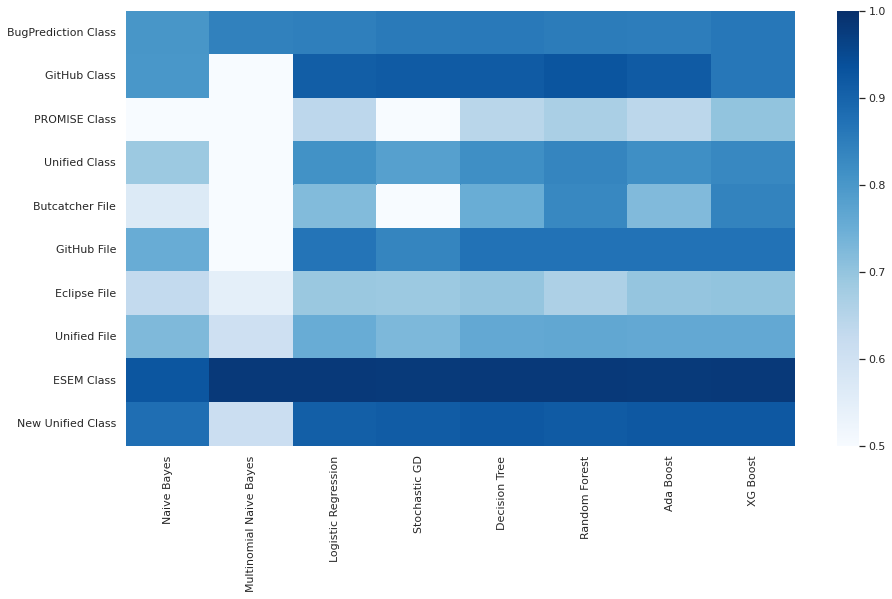

In [ ]:
import seaborn as sns; sns.set_theme()
y_axis_labels = ['BugPrediction Class','GitHub Class','PROMISE Class','Unified Class','Butcatcher File','GitHub File','Eclipse File','Unified File','ESEM Class','New Unified Class'] # labels for x-axis
x_axis_labels = ['Naive Bayes', 'Multinomial Naive Bayes', 'Logistic Regression', 'Stochastic GD', 'Decision Tree', 'Random Forest', 'Ada Boost', 'XG Boost'] # labels for y-axis
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(scores, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap="Blues", vmin=0.5, vmax=1)
